In [1]:
import json
import pandas as pd
import seaborn as sns
import scipy.stats as stats

sns.set_theme(style="ticks", palette="pastel")

files=['results_big_new/2to134Long.json']
longdf =pd.DataFrame()

dfs=[]
name={}
name['3662568322']="ipmedia-1"
name['3645790703']="ipmedia-2"
name['3629013084']="ipmedia-3"
name['3612235465']="ipmedia-4"

for file in files: 
    print("Using File:" + file.split('/')[1].split('.')[0])
    output=file.replace('.json','.csv')
    f=open(file)
    data=json.load(f)
    data=data[0] 
    sdf=pd.DataFrame(data['sender']['points'][0])
    keys=list(data['receivers'].keys())
    for key in keys: 
        #if key != "3662568322":
        #    continue 
        rdf=pd.DataFrame(data['receivers'][key]['points'][0])
        difdf=pd.DataFrame()
        difdf['dt_timestamp']=rdf['timestamp']-sdf['timestamp']
        difdf['dt_timestamp_ms']=difdf['dt_timestamp']/1000/1000
        difdf['dt_value']=rdf['value']-sdf['value']
        difdf['dt_sample']=rdf['sample']-sdf['sample']
        difdf['s_sample']=sdf['sample']
        difdf['r_sample']=rdf['sample']
        difdf['latency_s']=sdf['latency']
        difdf['latency_r']=rdf['latency']
        difdf['value']=sdf['value']
        difdf['sample']=sdf['sample']
        difdf['dt_timestamp_ms']=difdf['dt_timestamp']/1000/1000
        difdf['index'] = difdf.index
        difdf['testcase'] = file.split('/')[1].split('.')[0]
        difdf['receiver'] = name[key]
        difdf['key']=int(key)
        difdf['underflow']=rdf['underflow']
        difdf['overflow']=sdf['overflow']
        longdf=pd.concat([longdf, difdf])
        dfs.append(difdf)
        print(name[key])
ip1df=longdf[longdf['receiver'] == "ipmedia-1"]
ip3df=longdf[longdf['receiver'] == "ipmedia-3"]
ip4df=longdf[longdf['receiver'] == "ipmedia-4"]
longdf.head()

Using File:2to134Long
ipmedia-4
ipmedia-3
ipmedia-1


dt_timestamp  dt_timestamp_ms  dt_value  dt_sample  s_sample  r_sample  \
0    13384000.0          13.3840       0.0        1.0   10000.0     10001   
1    13365700.0          13.3657       0.0        1.0   20000.0     20001   
2    13462800.0          13.4628       0.0        1.0   30000.0     30001   
3    14661000.0          14.6610       0.0        1.0   40000.0     40001   
4    13362200.0          13.3622       0.0        1.0   50000.0     50001   

   latency_s  latency_r  value   sample  index    testcase   receiver  \
0      256.0          0    2.0  10000.0      0  2to134Long  ipmedia-4   
1      256.0          0    1.0  20000.0      1  2to134Long  ipmedia-4   
2      256.0          0    2.0  30000.0      2  2to134Long  ipmedia-4   
3      256.0          0    1.0  40000.0      3  2to134Long  ipmedia-4   
4      256.0          0    2.0  50000.0      4  2to134Long  ipmedia-4   

          key  underflow overflow  
0  3612235465      False    False  
1  3612235465      False    False  
2  3612235465      False    False  
3  3612235465      False    False  
4  3612235465      False    False

In [2]:
print(ip1df['dt_timestamp_ms'].median())
ip1df.describe()

-399.220992


dt_timestamp  dt_timestamp_ms    dt_value      dt_sample      s_sample  \
count  9.990000e+02       999.000000  999.000000     999.000000  9.990000e+02   
mean  -2.378794e+08      -237.879445    0.001001 -417505.850851  5.000000e+06   
std    2.398565e+08       239.856530    0.031639  243740.206011  2.885308e+06   
min   -8.211251e+08      -821.125120    0.000000 -848447.000000  1.000000e+04   
25%   -4.019222e+08      -401.922176    0.000000 -627359.000000  2.505000e+06   
50%   -3.992210e+08      -399.220992    0.000000 -424735.000000  5.000000e+06   
75%    1.497446e+07        14.974464    0.000000 -203647.000000  7.495000e+06   
max    1.908070e+07        19.080704    1.000000    -975.000000  9.990000e+06   

           r_sample  latency_s  latency_r       value        sample  \
count  1.003000e+03      999.0     1003.0  999.000000  9.990000e+02   
mean   4.600767e+06      256.0        0.0    1.500501  5.000000e+06   
std    2.652132e+06        0.0        0.0    0.500250  2.885308e+06   
min    9.025000e+03      256.0        0.0    1.000000  1.000000e+04   
25%    2.310585e+06      256.0        0.0    1.000000  2.505000e+06   
50%    4.593729e+06      256.0        0.0    2.000000  5.000000e+06   
75%    6.895081e+06      256.0        0.0    2.000000  7.495000e+06   
max    9.178225e+06      256.0        0.0    2.000000  9.990000e+06   

             index           key  
count  1003.000000  1.003000e+03  
mean    501.000000  3.662568e+09  
std     289.685462  0.000000e+00  
min       0.000000  3.662568e+09  
25%     250.500000  3.662568e+09  
50%     501.000000  3.662568e+09  
75%     751.500000  3.662568e+09  
max    1002.000000  3.662568e+09

In [3]:
print(ip3df['dt_timestamp_ms'].median())
ip3df.describe()

14.754299999999999


dt_timestamp  dt_timestamp_ms  dt_value  dt_sample      s_sample  \
count  9.990000e+02       999.000000     999.0      999.0  9.990000e+02   
mean   1.504181e+07        15.041810       0.0        1.0  5.000000e+06   
std    5.794042e+05         0.579404       0.0        0.0  2.885308e+06   
min    1.443280e+07        14.432800       0.0        1.0  1.000000e+04   
25%    1.465900e+07        14.659000       0.0        1.0  2.505000e+06   
50%    1.475430e+07        14.754300       0.0        1.0  5.000000e+06   
75%    1.486610e+07        14.866100       0.0        1.0  7.495000e+06   
max    1.616920e+07        16.169200       0.0        1.0  9.990000e+06   

           r_sample  latency_s  latency_r       value        sample  \
count  9.990000e+02      999.0      999.0  999.000000  9.990000e+02   
mean   5.000001e+06      256.0        0.0    1.500501  5.000000e+06   
std    2.885308e+06        0.0        0.0    0.500250  2.885308e+06   
min    1.000100e+04      256.0        0.0    1.000000  1.000000e+04   
25%    2.505001e+06      256.0        0.0    1.000000  2.505000e+06   
50%    5.000001e+06      256.0        0.0    2.000000  5.000000e+06   
75%    7.495001e+06      256.0        0.0    2.000000  7.495000e+06   
max    9.990001e+06      256.0        0.0    2.000000  9.990000e+06   

            index           key  
count  999.000000  9.990000e+02  
mean   499.000000  3.629013e+09  
std    288.530761  0.000000e+00  
min      0.000000  3.629013e+09  
25%    249.500000  3.629013e+09  
50%    499.000000  3.629013e+09  
75%    748.500000  3.629013e+09  
max    998.000000  3.629013e+09

In [4]:
print(ip4df['dt_timestamp_ms'].median())
ip4df.describe()

13.3642


dt_timestamp  dt_timestamp_ms  dt_value  dt_sample      s_sample  \
count  9.990000e+02       999.000000     999.0      999.0  9.990000e+02   
mean   1.370604e+07        13.706041       0.0        1.0  5.000000e+06   
std    5.810664e+05         0.581066       0.0        0.0  2.885308e+06   
min    1.303450e+07        13.034500       0.0        1.0  1.000000e+04   
25%    1.335780e+07        13.357800       0.0        1.0  2.505000e+06   
50%    1.336420e+07        13.364200       0.0        1.0  5.000000e+06   
75%    1.361635e+07        13.616350       0.0        1.0  7.495000e+06   
max    1.485700e+07        14.857000       0.0        1.0  9.990000e+06   

           r_sample  latency_s  latency_r       value        sample  \
count  9.990000e+02      999.0      999.0  999.000000  9.990000e+02   
mean   5.000001e+06      256.0        0.0    1.500501  5.000000e+06   
std    2.885308e+06        0.0        0.0    0.500250  2.885308e+06   
min    1.000100e+04      256.0        0.0    1.000000  1.000000e+04   
25%    2.505001e+06      256.0        0.0    1.000000  2.505000e+06   
50%    5.000001e+06      256.0        0.0    2.000000  5.000000e+06   
75%    7.495001e+06      256.0        0.0    2.000000  7.495000e+06   
max    9.990001e+06      256.0        0.0    2.000000  9.990000e+06   

            index           key  
count  999.000000  9.990000e+02  
mean   499.000000  3.612235e+09  
std    288.530761  0.000000e+00  
min      0.000000  3.612235e+09  
25%    249.500000  3.612235e+09  
50%    499.000000  3.612235e+09  
75%    748.500000  3.612235e+09  
max    998.000000  3.612235e+09

[Text(0.5, 0, 'Index'), Text(0, 0.5, 'Latency [ms]')]

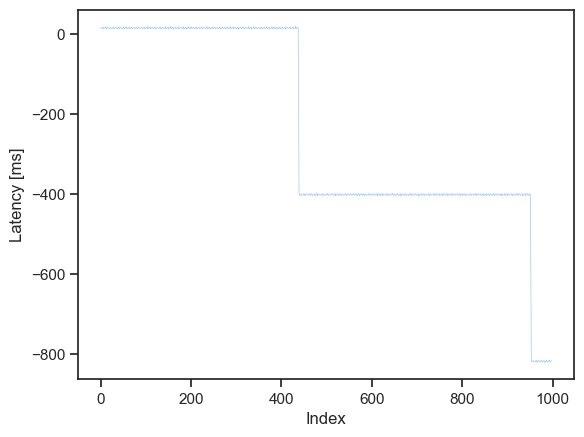

In [5]:
ax=sns.lineplot(x='index', y='dt_timestamp_ms', data=dfs[2],linewidth=0.5)
ax.set(xlabel='Index', ylabel='Latency [ms]')

[Text(0.5, 0, 'Index'), Text(0, 0.5, 'Difference Samples')]

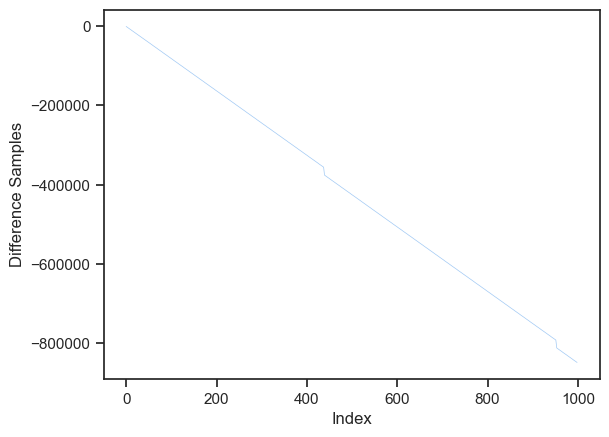

In [6]:
ax=lplt2=sns.lineplot(x='index', y='dt_sample', data=dfs[2],linewidth=0.5)
ax.set(xlabel='Index', ylabel='Difference Samples')

[Text(0.5, 0, 'Index'), Text(0, 0.5, 'Underflow'), (-1.0, 1.0)]

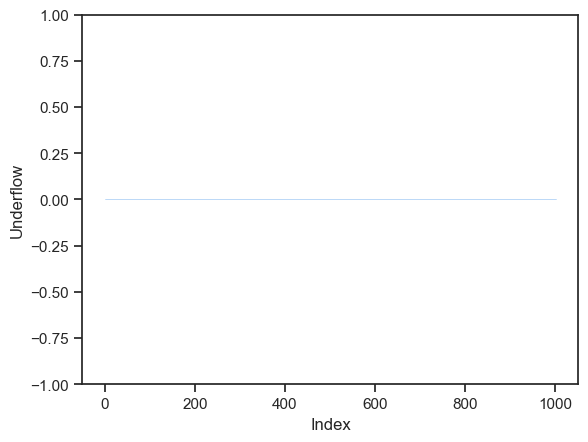

In [37]:
ax=lplt2=sns.lineplot(x='index', y='underflow', data=dfs[2],linewidth=0.5)
ax.set(xlabel='Index', ylabel='Underflow', ylim=(-1, 1))


[Text(0.5, 0, 'Receiver'), Text(0, 0.5, 'Latency [ms]')]

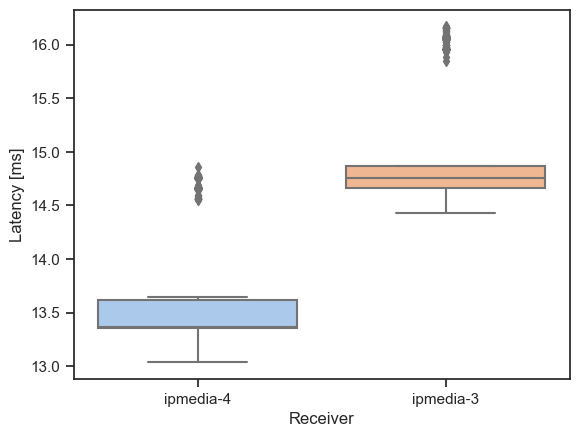

In [8]:
shorten2to34 = longdf[longdf['receiver'] != "ipmedia-1"]
ax=sns.boxplot(y=shorten2to34['dt_timestamp_ms'],x=shorten2to34['receiver'])
ax.set(xlabel='Receiver', ylabel='Latency [ms]')

[Text(0.5, 0, 'Receiver'), Text(0, 0.5, 'Latency [ms]')]

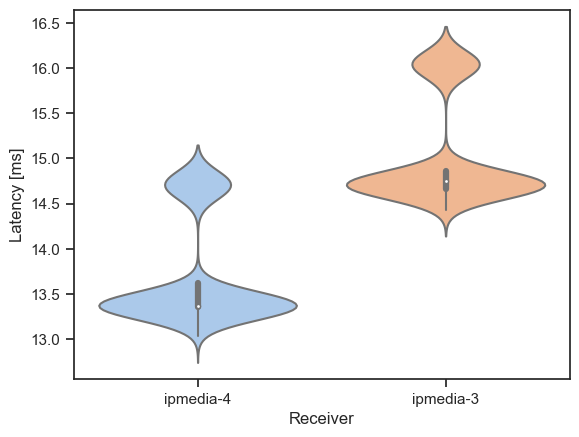

In [9]:
ax=sns.violinplot(x=shorten2to34['receiver'], y=shorten2to34['dt_timestamp_ms'])
ax.set(xlabel='Receiver', ylabel='Latency [ms]')

In [10]:
from scipy.stats import ttest_ind
data1=shorten2to34[shorten2to34['receiver'] =='ipmedia-4']['dt_timestamp_ms']
data2=shorten2to34[shorten2to34['receiver'] =='ipmedia-3']['dt_timestamp_ms']

t_statistic, p_value = ttest_ind(data1, data2, equal_var=True, alternative='less')
print("t-statistic:", t_statistic)
print("{:e}".format(p_value))
print("p-value:", p_value)

t-statistic: -51.45109791951746
0.000000e+00
p-value: 0.0


In [24]:
files=['results_big_new/2to134Long.json']
phasedfs =pd.DataFrame()

name={}
name['3662568322']="ipmedia-1"
name['3645790703']="ipmedia-2"
name['3629013084']="ipmedia-3"
name['3612235465']="ipmedia-4"

for file in files: 
    print("Using File:" + file.split('/')[1].split('.')[0])
    output=file.replace('.json','.csv')
    f=open(file)
    data=json.load(f)
    data=data[0] 
    sdf=pd.DataFrame(data['sender']['points'][0])
    keys=list(data['receivers'].keys())
    for key in keys: 
        if key == "3662568322":
            continue 
        rdf=pd.DataFrame(data['receivers'][key]['points'][0])
        rdf['receiver'] = name[key]
        rdf['key']=int(key)
        phasedfs=pd.concat([phasedfs, rdf])

gdf=phasedfs.groupby('receiver')
ip4df=gdf.get_group('ipmedia-4')
ip3df=gdf.get_group('ipmedia-3')
gdf.get_group('ipmedia-4')

Using File:2to134Long


timestamp   sample  value  latency  underflow  overflow  \
0    1680268842872348200    10001      2        0      False     False   
1    1680268843080331500    20001      1        0      False     False   
2    1680268843288327200    30001      2        0      False     False   
3    1680268843497628000    40001      1        0      False     False   
4    1680268843705632500    50001      2        0      False     False   
..                   ...      ...    ...      ...        ...       ...   
994  1680269049955027200  9950001      2        0      False     False   
995  1680269050164327000  9960001      1        0      False     False   
996  1680269050372331300  9970001      2        0      False     False   
997  1680269050580328200  9980001      1        0      False     False   
998  1680269050788326700  9990001      2        0      False     False   

     channel   receiver         key  
0          0  ipmedia-4  3612235465  
1          0  ipmedia-4  3612235465  
2          0  ipmedia-4  3612235465  
3          0  ipmedia-4  3612235465  
4          0  ipmedia-4  3612235465  
..       ...        ...         ...  
994        0  ipmedia-4  3612235465  
995        0  ipmedia-4  3612235465  
996        0  ipmedia-4  3612235465  
997        0  ipmedia-4  3612235465  
998        0  ipmedia-4  3612235465  

[999 rows x 9 columns]

In [26]:
phaseDf=pd.DataFrame()
phaseDf['dt43']=ip4df['timestamp']-ip3df['timestamp']
phaseDf['dt43_ms']=phaseDf['dt43']/1000000

In [27]:
print(phaseDf.median())
phaseDf.describe()

dt43      -1.302200e+06
dt43_ms   -1.302200e+00
dtype: float64


dt43     dt43_ms
count  9.990000e+02  999.000000
mean  -1.335769e+06   -1.335769
std    6.689088e+04    0.066891
min   -1.556100e+06   -1.556100
25%   -1.395650e+06   -1.395650
50%   -1.302200e+06   -1.302200
75%   -1.294750e+06   -1.294750
max   -1.016900e+06   -1.016900

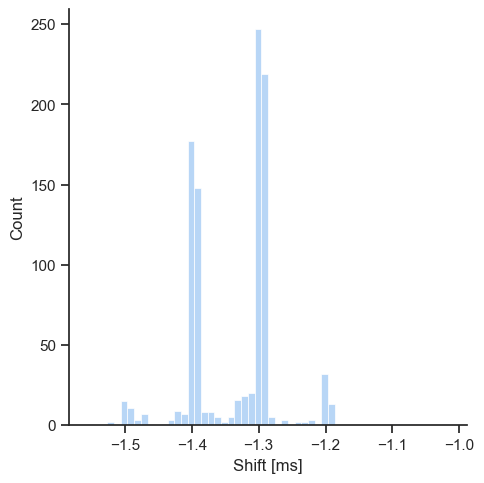

In [39]:
ax=sns.displot(
    phaseDf, x="dt43_ms",
    binwidth=0.01, height=5, facet_kws=dict(margin_titles=True),
)
ax.set(xlabel='Shift [ms]')
